In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import astropy as ap
import scipy as sc

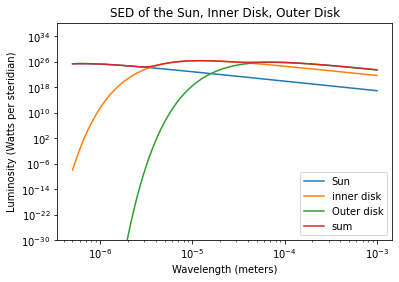

In [2]:
#1


#blackbody
def bbfunc(x,t,rout,rin):
    c = 299800000 #m/s
    h = 6.626*(10**(-34)) #si
    k = 1.380649*(10**(-23)) #si
    b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t))-1))
    lum = b*(np.pi*rout**2-np.pi*rin**2)
    return(lum)

#wl range
#wl= np.linspace(np.log10(0.5*(10**(-6))), np.log10(1000*(10**(-6))),num=100) #meters
wl= np.logspace(-6.3, -3,num=100) #meters

#sun
tsun = 5800 #K
rsun = 696000000
l1 = bbfunc(wl,tsun,rsun,0)
plt.plot(wl,l1*wl,label = 'Sun')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (meters)')
plt.ylabel('Luminosity (Watts per steridian)')
plt.title('SED of the Sun, Inner Disk, Outer Disk')

#inner disk
tin = 300 #K
r1 = .1*(1.496*(10**11))
r2 = 5*(1.496*(10**11))
l2 = bbfunc(wl,tin,r2,r1)
plt.plot(wl,l2*wl,label='inner disk')
\

#outer disk
tout = 50 #K
r3 = 5*(1.496*(10**11))
r4 = 100*(1.496*(10**11))
l3 = bbfunc(wl,tout,r4,r3)
plt.plot(wl,l3*wl,label = 'Outer disk')

#sum
plt.plot(wl,(l1*wl+l2*wl+l3*wl),label='sum')

x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,10**-30,y2))
plt.legend()

/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))
/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))
/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))


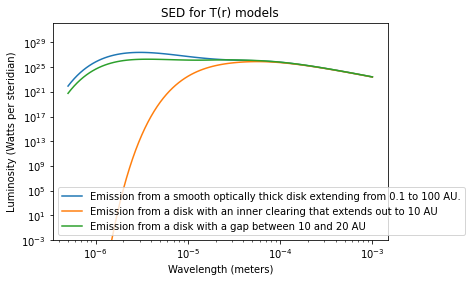

In [3]:
#2

#T(r)
def temp(r):
    Lsun = 3.846*(10**26) #W
    albedo = 0.1 
    sig = 5.670374419*(10**(-8)) #W⋅m−2⋅K−4
    t = (Lsun*(1-albedo)/(4*sig*np.pi*(r**2)))**0.25

    return(t)

rad = np.linspace(.1*(1.496*(10**11)),100*(1.496*(10**11)),100) #m, .1 to 100 AU

t1 = temp(rad)
#plt.plot(t1,rad)


def bbfunc2(x,r):
    lums = np.zeros([len(r),len(x)])
    for i in range(len(r)-1):
        t2 = temp(r[i])
        
        c = 299800000 #m/s
        h = 6.626*(10**(-34)) #si
        k = 1.380649*(10**(-23)) #si
        
        b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))
        lum = b*(np.pi*r[i+1]**2-np.pi*r[i]**2)
        lums[i] = lum
    return(lums)

#first case
lum2 = bbfunc2(wl,rad)
lum3 = np.sum(lum2, axis=0)
plt.plot(wl,lum3*wl,label='Emission from a smooth optically thick disk extending from 0.1 to 100 AU.')
plt.xscale('log')
plt.yscale('log')

#second case
rad2 = np.linspace(10*(1.496*(10**11)),100*(1.496*(10**11)),100) #m, 10 to 100 AU
lum4 = bbfunc2(wl,rad2)
lum5 = np.sum(lum4, axis=0)
plt.plot(wl,lum5*wl,label='Emission from a disk with an inner clearing that extends out to 10 AU')

#third case
rad3 = np.append(np.linspace(.1*(1.496*(10**11)),10*(1.496*(10**11)),50),np.linspace(20*(1.496*(10**11)),100*(1.496*(10**11)),50))  #m, .1 to 10 and 20 to 100 AU
lum6 = bbfunc2(wl,rad3)
lum7 = np.sum(lum6, axis=0)
plt.plot(wl,lum7*wl,label='Emission from a disk with a gap between 10 and 20 AU ')

x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,10**-3,y2))

plt.xlabel('Wavelength (meters)')
plt.ylabel('Luminosity (Watts per steridian)')
plt.title('SED for T(r) models')
plt.legend()


In [4]:
lum2

array([[1.72840980e+028, 6.75874924e+028, 2.32283555e+029, ...,
        1.58179824e+024, 1.16423317e+024, 8.56864995e+023],
       [5.34396148e+004, 1.22607457e+007, 1.82999043e+009, ...,
        1.24742919e+024, 9.19234752e+023, 6.77300871e+023],
       [7.45583726e-009, 1.57945010e-005, 1.84702189e-002, ...,
        1.45416219e+024, 1.07228539e+024, 7.90553121e+023],
       ...,
       [0.00000000e+000, 6.08234952e-258, 4.14068427e-236, ...,
        6.62534355e+024, 4.95788030e+024, 3.70512351e+024],
       [0.00000000e+000, 1.81590410e-259, 1.60357060e-237, ...,
        6.65109832e+024, 4.97761822e+024, 3.72019312e+024],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

# Part 3

I use equation 26 from Armitage:

$ \Sigma \propto r^{-p}$, where p=1 typically.

$ \Sigma_{tot} = \int_{R_{min}}^{R_{max}} \frac{\Sigma_0}{r} dr$

$ \Sigma_{tot} = \Sigma_0 (ln(R_{max}) - ln(R_{min}))$

$ M_{disk} = \Sigma_0 \pi (R_{max}^2 - R_{min}^2) (ln(R_{max}) - ln(R_{min}))$

$ \Sigma_0 = M_{disk} / \pi (R_{max}^2 - R_{min}^2) (ln(R_{max}) - ln(R_{min}))$

which gives the normalization factor.

Then for each ring, use the integral

$ \Sigma(R_1, R_2) = \int_{R_1}^{R_2} \Sigma_0/r dr$

giving equation

$\Sigma(R_1, R_2) = \Sigma_0 (ln(R_2 / R_1))$

Then the fraction of this which is dust is

$\Sigma_{dust}(R_1, R_2) = \Sigma(R_1, R_2) * f_{dust}$

/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))
/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))
/tmp/ipykernel_181/1318100787.py:27: RuntimeWarning: overflow encountered in exp
  b = (2*h*(c**2)/(x**5))*(1/(np.exp(h*c/(x*k*t2))-1))


[]

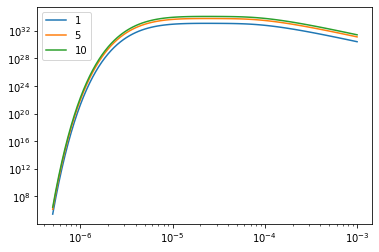

In [12]:
# part 3

def thin_bb(wvln, radii, disk_mass, dust_fraction, opacity = 0.01):
    sigma_0 = disk_mass / (np.pi * (radii[-1]**2 - radii[0]**2) * np.log(radii[-1]/radii[0]))
    sigma_r = sigma_0 * np.log(radii[1:] - radii[:-1])
    sigma_dust = sigma_r * dust_fraction
    
    thick_bb = bbfunc2(wvln, radii[1:]) # sigma has dim len(r) - 1
    
    tau = np.ones_like(thick_bb)* opacity # shape 99 radii, 100 wavelengths
    tau = sigma_r @ tau
    return thick_bb * tau

# idk the minimum mass solar nebula, adjust this value as needed
min_disk_mass = 1.989e33 # grams

for val in [1, 5, 10]:
    
    lum = np.sum(thin_bb(wl, rad, min_disk_mass * val, 0.1), axis = 0)
    plt.plot(wl, wl*lum, label=val)

plt.legend()
plt.loglog()